<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>
<h2 align='center'> Maria Apolo Rol: 201573509-3 </h1>
<h2 align='center'> Diego Gutierrez Rol: 201573558-1 </h1>
<h2 align='center'> Profesor: Ricardo Ñanculef </h1>
<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).


In [22]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows2 = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows2, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values


> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.
```python
df_train_sentiment.shape
```

In [23]:
df_train.head()

,Sentiment,Text
0,0.0,"everything's serious , poetic , earnest and --..."
1,0.0,"narratively , trouble every day is a plodding ..."
2,1.0,a truly wonderful tale combined with stunning ...
3,1.0,jason patric and ray liotta make for one splen...
4,0.0,haneke keeps us at arm's length . guided more ...


In [24]:
print("Tamaño de dataset de train: ", df_train.shape)
print("Tamaño de dataset de test: ", df_test.shape)
print("Cantidad de opiniones positivas para el train set: ",df_train.loc[df_train['Sentiment'] == 1].shape[0])
print("Cantidad de opiniones negativas para el train set: ",df_train.loc[df_train['Sentiment'] == 0].shape[0])
print("Cantidad de opiniones positivas para el test set: ",df_test.loc[df_test['Sentiment'] == 1].shape[0])
print("Cantidad de opiniones negativas para el test set: ",df_test.loc[df_test['Sentiment'] == 0].shape[0])

Tamaño de dataset de train:  (3554, 2)
Tamaño de dataset de test:  (3554, 2)
Cantidad de opiniones positivas para el train set:  1770
Cantidad de opiniones negativas para el train set:  1784
Cantidad de opiniones positivas para el test set:  1751
Cantidad de opiniones negativas para el test set:  1803


El dataset corresponde a una clasificación binaria del análisis sentimental de opiniones vertidas en la plataforma Rotten Tomatoes para diferentes películas. Estas opiniones están codificadas como "1" y "0" para opiniones positivas y negativas respectivamente. Observando la cantidad de opiniones para cada clase, se aprecia que ambos conjuntos (de train y test) están balanceados, dado que hay cantidades similares de opiniones positivas y negativas. 

> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.


In [25]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.3, random_state=0)


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.



In [26]:

import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize

def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 

def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) if len(word)>3]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    #print(words)
    return words

print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]


 love cake
 love eating cake
 loved eating cake
 love eating cake
 love eating cake


Se utiliza un preprocesamiento en el texto para estructurarlo de tal forma que se eliminen elementos como la puntuación, los números, las stopwords, se pase el texto a minúsculas y se realice el proceso de lematización, que agrupe palabras que tengan una raíz en común en un solo ítem, como podrían ser distintas conjugaciones para un mismo verbo. Esto se realiza con la finalidad de reducir el vocabulario y que textos diferentes tengan una misma estructura en común. 

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?


In [27]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer1.fit(texts_train)
features_train = vectorizer1.transform(texts_train)
features_test = vectorizer1.transform(texts_test)
features_val = vectorizer1.transform(texts_val)
vocab = vectorizer1.get_feature_names()
dist1=list(np.array(features_train.sum(axis=0)).reshape(-1,))
lista = zip(vocab, dist1)
print("Palabras mas repetidas para el conjunto de entrenamiento:\n",sorted((lista),key=lambda x: x[1],reverse=True)[:10])
dist2=list(np.array(features_test.sum(axis=0)).reshape(-1,))
lista2 = zip(vocab, dist2)
print("\nPalabras mas repetidas para el conjunto de test:\n",sorted((lista2),key=lambda x: x[1],reverse=True)[:10])
dist3=list(np.array(features_val.sum(axis=0)).reshape(-1,))
lista3 = zip(vocab, dist3)
print("\nPalabras mas repetidas para el conjunto de validacion:\n",sorted((lista3),key=lambda x: x[1],reverse=True)[:10])

Palabras mas repetidas para el conjunto de entrenamiento:
 [('film', 423), ('movie', 349), ('like', 166), ('make', 141), ('story', 128), ('character', 120), ('good', 105), ('even', 104), ('comedy', 95), ('time', 93)]

Palabras mas repetidas para el conjunto de test:
 [('film', 581), ('movie', 568), ('like', 239), ('story', 204), ('character', 178), ('time', 176), ('make', 167), ('good', 142), ('comedy', 138), ('doe', 134)]

Palabras mas repetidas para el conjunto de validacion:
 [('film', 161), ('movie', 154), ('like', 89), ('time', 55), ('comedy', 52), ('doe', 50), ('good', 49), ('story', 49), ('character', 45), ('make', 45)]


> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados


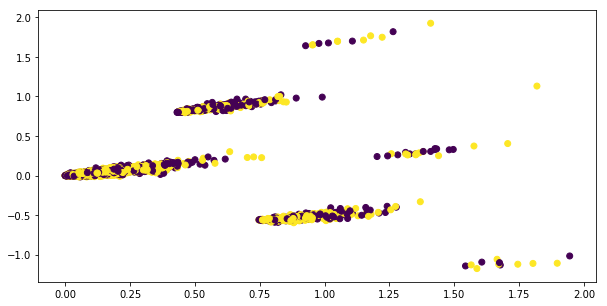

In [28]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

A partir de la gráfica anterior, se puede observar una descomposición de los datos en 6 agrupaciones semánticas, donde se destacan 3 de ellas con una mayor cantidad de elementos. En cada agrupación semántica se puede observar que está equilibrada la cantidad de opiniones positivas y negativas recibidas, al tener una cantidad similar de puntos amarillos y morados en cada componente. 

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

Param C=  0.0001
Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1.0
Param C=  10.0
Param C=  100.0
Param C=  1000.0


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


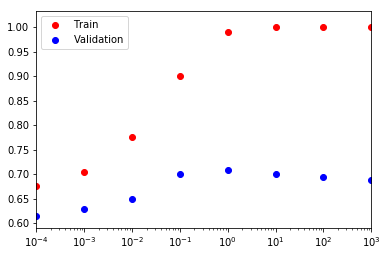

In [8]:
from sklearn.linear_model import LogisticRegression
import pylab
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    val_acc = model.score(xv,yv)
    return model, train_acc, val_acc

Cs = [10**i for i in np.arange(-4,4, dtype=float)]
list_train_acc = []
list_val_acc= []
for i in Cs:
    model, train_acc, val_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, i)
    list_train_acc.append(train_acc)
    list_val_acc.append(val_acc)
#plt.plot(Cs,list_train_acc)

plt.scatter(Cs,list_train_acc, c='r', label='Train')
plt.scatter(Cs,list_val_acc, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()


En la gráfica se modelo la accuracy del modelo en función del parámetro de regularización C, aplicado al conjunto de entrenamiento (puntos rojos) y al conjunto de validación (puntos azules). Cabe mencionar que el conjunto de validación se obtuvo extrayendo un 30% de los datos del conjunto de entrenamiento y dejando el 70% restante para entrenar. 
Al observar la gráfica, se puede distinguir que el modelo de regresión logística regularizado aplicado al conjunto de entrenamiento tiene una mayor accuracy para cualquier valor de C graficado. Por otro lado, se distingue que la accuracy aumenta a medida que aumenta el valor del parámetro C. En el caso del conjunto de validación, la mayor accuracy se obtiene para C = 1. 

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.


Param C=  0.0001 Kernel=  linear
Param C=  0.0001 Kernel=  rbf


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.001 Kernel=  linear
Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  linear
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  linear
Param C=  0.1 Kernel=  rbf
Param C=  1.0 Kernel=  linear
Param C=  1.0 Kernel=  rbf
Param C=  10.0 Kernel=  linear
Param C=  10.0 Kernel=  rbf
Param C=  100.0 Kernel=  linear
Param C=  100.0 Kernel=  rbf
Param C=  1000.0 Kernel=  linear
Param C=  1000.0 Kernel=  rbf


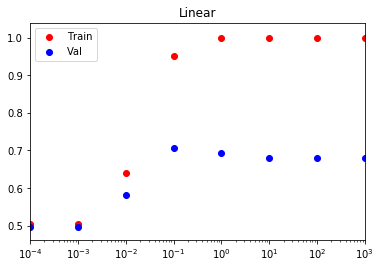

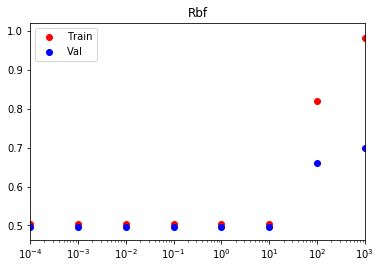

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

list_train_acc = []
list_test_acc = []
list2_train_acc = []
list2_test_acc = []

Cs = [10**i for i in np.arange(-4,4,dtype=float)]
for i in Cs:
    _, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,i,'linear')
    list_train_acc.append(train_acc)
    list_test_acc.append(test_acc)
    _, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,i,'rbf')
    list2_train_acc.append(train_acc)
    list2_test_acc.append(test_acc)

def plot(Name,Cs,lista1,lista2):
    plt.scatter(Cs,lista1,c='r',label='Train')
    plt.scatter(Cs,lista2,c='b',label='Val')
    pylab.legend(loc='upper left')
    plt.xscale("log")
    plt.xlim([10**-4,10**3])
    plt.title(Name)
    plt.show()

plot('Linear',Cs,list_train_acc,list_test_acc)
plot('Rbf',Cs,list2_train_acc,list2_test_acc)

A partir de los gráficos, se puede observar que SVM con kernel lineal tiene mayor accuracy que SVM con kernel RBF o gaussiano, lo cual podríamos atribuir a que los datos originales son linealmente separables.  

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.


Param K=  1
1.0
0.5604498594189316
Param K=  11
0.584238037796542
0.5107778819119025
Param K=  21
0.6546039404905508
0.5417057169634489
Param K=  31
0.6473663047848813
0.5923149015932521
Param K=  41
0.6208283071974267
0.5679475164011246
Param K=  51
0.605146763168476
0.5745079662605436
Param K=  61
0.5729794933655006
0.5595126522961574
Param K=  71
0.5589063128266988
0.549203373945642
Param K=  81
0.5689585846401287
0.555763823805061
Param K=  91
0.5749899477281866
0.549203373945642


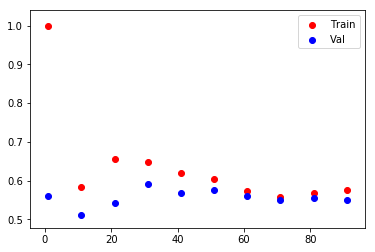

In [10]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Ks = np.arange(1, 100, 10) 
list_train_acc = []
list_test_acc = []
for i in Ks:
    _, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val,i)
    list_train_acc.append(train_acc)
    list_test_acc.append(test_acc)
    print(train_acc)
    print(test_acc)

plt.scatter(Ks,list_train_acc,c='r',label='Train')
plt.scatter(Ks,list_test_acc,c='b',label='Val')
pylab.legend(loc='upper right')
plt.show()

En el conjunto de entrenamiento se puede observar que, a medida que aumenta la cantidad de vecinos involucrados en la clasificación, disminuye la accuracy. Esto se debe a que una cantidad definida de vecinos más cercanos (por ejemplo, en el peak k = 20) sean los realmente significativos a nivel de similaridad y si se va aumentando este número, se tomarán en cuenta vecinos que no tengan similitudes importantes con el individuo a clasificar, por lo que la accuracy disminuirá. Inclusive, esto se puede observar en la vida real, donde del universo de personas que conocemos, hay una cantidad muy reducida de ellas que tengan intereses similares a los nuestros. Más aún en el caso del problema, donde los individuos clasificados podrían no tener ninguna relación entre si. 


> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.
```python
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], steps ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , steps ) #choose steps
```


Param Max-D=  1 Min-samples-S=  2
Param Max-D=  301 Min-samples-S=  2
Param Max-D=  601 Min-samples-S=  2
Param Max-D=  901 Min-samples-S=  2
Param Max-D=  1201 Min-samples-S=  2
Param Max-D=  1501 Min-samples-S=  2
Param Max-D=  1801 Min-samples-S=  2
Param Max-D=  2101 Min-samples-S=  2
Param Max-D=  2401 Min-samples-S=  2
Param Max-D=  2701 Min-samples-S=  2
Param Max-D=  3001 Min-samples-S=  2
Param Max-D=  3301 Min-samples-S=  2
Param Max-D=  3601 Min-samples-S=  2
Param Max-D=  3901 Min-samples-S=  2
Param Max-D=  4201 Min-samples-S=  2
Param Max-D=  4501 Min-samples-S=  2
Param Max-D=  4801 Min-samples-S=  2
Param Max-D=  5101 Min-samples-S=  2
Param Max-D=  5401 Min-samples-S=  2
Param Max-D=  5701 Min-samples-S=  2
Param Max-D=  6001 Min-samples-S=  2
Param Max-D=  6301 Min-samples-S=  2
Param Max-D=  6601 Min-samples-S=  2
Param Max-D=  6901 Min-samples-S=  2
Param Max-D=  7201 Min-samples-S=  2
Param Max-D=  7501 Min-samples-S=  2
Param Max-D=  None Min-samples-S=  2
Param M

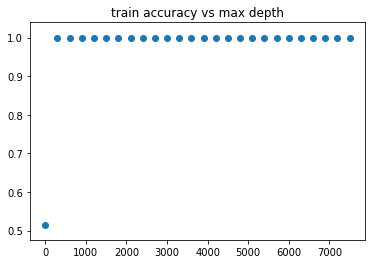

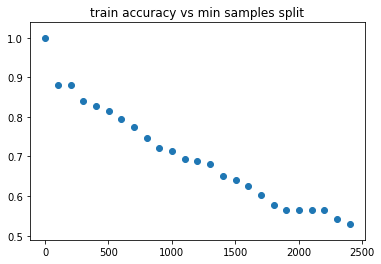

In [11]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d, param_m):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 300 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 100 ) #choose steps

acc_depths = []
acc_samples = []

for i in Depths:
    _, train_acc, _ = do_Tree(features_train, labels_train, features_val, labels_val, i, 2)
    acc_depths.append(train_acc)

for j in SamplesS:
    _, train_acc, _ = do_Tree(features_train, labels_train, features_val, labels_val, None, j)
    acc_samples.append(train_acc)
    
plt.scatter(Depths, acc_depths)
plt.title('train accuracy vs max depth')
plt.show() 

plt.scatter(SamplesS, acc_samples)
plt.title('train accuracy vs min samples split')
plt.show() 
    
    

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.


Using TensorFlow backend.


Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


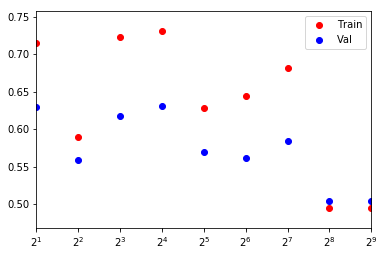

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]

acc_train = []
acc_val = []

for i in N_h:
    _, train_acc, val_acc = do_ANN(features_train, labels_train, features_val, labels_val, i)
    acc_train.append(train_acc)
    acc_val.append(val_acc)
    

plt.scatter(N_h,acc_train,c='r',label='Train')
plt.scatter(N_h,acc_val,c='b',label='Val')  
plt.xscale("symlog",basex=2)
plt.xlim(2**1, 2**9)
#plt.xticks(np.linspace(2**1, 2**9, 9, endpoint=True))
pylab.legend(loc='upper right')
plt.show()



En este gráfico podemos darnos cuenta de que la acuraccy no tiene una tendencia clara a medida que se aumenta la cantidad de neuronas ocultas. 


> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?



El mejor modelo obtenido observando los gráficos es el de Regresión Logística, donde se obtiene una acuraccy aproximadamente de 0.71 para el conjunto de validación. Respecto a la calidad obtenida, esta es buena dado que no se tenia un conjunto de entrenamiento tan grande, lo que provoco que el acuraccy no fuera mayor aun. Adémas, una posible equivocación en el resultado para este problema específico no tiene consecuencias graves como lo sería para la detección de una enfermedad. Dado esto, un valor de referencia para este problema podría estar entre 0.7 y 0.8.

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

Al comparar los resultados de este modelo con los modelos anteriores, se puede observar que la predicción realizada por el modelo VADER está dentro de los rangos de valores para accuracy obtenidos por los modelos anteriores, por lo que se puede concluir que este modelo es una buena aproximación para predecir opiniones sobre las películas, con la ventaja de que cuenta con un menor tiempo de ejecución que los modelos anteriores, dado que no realiza entrenamiento.

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.
```python
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab
```

In [14]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

In [15]:
a=word_scores[:,0].argsort()[-15:][::-1]
print("Las palabras mas negativas son:")
for i in a:
    print(vocab[i])
print("--------------")
print("Las palabras mas positivas son:")
b=word_scores[:,1].argsort()[-15:][::-1]
for i in b:
    print(vocab[i])

Las palabras mas negativas son:
worst
mildly
dull
stale
apparent
dramatically
cliche
flat
comedic
unfortunately
devoid
save
suffers
pretentious
heavy
--------------
Las palabras mas positivas son:
took
album
engage
skillful
solid
marching
marvel
world
creative
witty
openness
loved
dense
still
storytelling


Una vez obtenidas ambas listas, se observa que tanto positivas como negativas concuerdan en gran medida con lo esperado, obteniendo adjetivos como 'solid', 'creative' y 'loved'  para las positivas, que tienen una marcada connotación de buena recepción respecto a la película. Por parte de las palabras negativas, se obtuvieron palabras como 'heavy', 'pretentious' y 'worst', las cuales demuestran una clara connotación negativa y de mala recepción. También se obtuvieron algunas palabras neutrales, cuya presencia se debe a que son palabras de uso habitual en las reseñas como 'storytelling'.

> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.
```python
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)
```

In [16]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def base_word(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word) 

def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) if len(word)>3]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer2 = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer2.fit(texts_train)
features_train = vectorizer2.transform(texts_train)
features_test = vectorizer2.transform(texts_test)
features_val = vectorizer2.transform(texts_val)

model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1.0 )

model.score(features_test, labels_test)

 love cake
 love eat cake
 love eat cake
 love eat cake
 love eat cake
Param C=  1.0


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7121553179516038

> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.




In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
features_train = tfidf_model.transform(texts_train)
features_test=tfidf_model.transform(texts_test)
features_val=tfidf_model.transform(texts_val)

model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1.0 )
model.score(features_test, labels_test)

Param C=  1.0


0.7203151378728193

Utilizando Tfidf se obtiene la mejor acuraccy hasta ahora, mejorando la precisión obtenida en el inciso n)

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?



In [18]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))

classes_weights = {0: 1,1:1}
model.set_params(class_weight=classes_weights)
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.71      0.75      0.73      1803
           +       0.73      0.69      0.71      1751

   micro avg       0.72      0.72      0.72      3554
   macro avg       0.72      0.72      0.72      3554
weighted avg       0.72      0.72      0.72      3554



Se puede apreciar que tanto para las opiniones positivas como negativas el modelo posee falencias para determinar con certeza la categoría de la opinión. Por otro lado, hay que mencionar que el rendimiento para ambos es similar y cada etiqueta posee una importancia similar a la otra. El valor de soporte entrega que ambos poseen una cantidad similar de etiquetas, por lo que no hay una influencia de una etiqueta en la otra.

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.


In [19]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.54      0.99      0.70      1803
           +       0.93      0.13      0.22      1751

   micro avg       0.56      0.56      0.56      3554
   macro avg       0.73      0.56      0.46      3554
weighted avg       0.73      0.56      0.46      3554





El cambio de pesos aumento el recall para las etiquetas negativas y disminuye para la positiva. Esto significa que aumenta la capacidad del modelo para no errar al momento de clasificar las opiniones que deberian poseer una etiqueta negativa. La baja en el valor del recall de las opiniones positivas implica que la capacidad del modelo para acertar a la hora de clasificar los elementos de esa etiqueta es bastante baja. 

En consecuencia de lo mencionado anteriormente, la precisión para las etiquetas positivas aumenta y la precisión para las etiquetas negativas disminuye.

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente


In [20]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.86078608 0.13921392]
Raw text:  it is most of the things costner movies are known for ; it's sanctimonious , self-righteous and so eager to earn our love that you want to slap it .

True sent:  0.0 -- Pred sent:  [0.8652068 0.1347932]
Raw text:  the master of disguise falls under the category of 'should have been a sketch on saturday night live . '

True sent:  1.0 -- Pred sent:  [0.72532304 0.27467696]
Raw text:  meyjes' provocative film might be called an example of the haphazardness of evil .

True sent:  1.0 -- Pred sent:  [0.63254576 0.36745424]
Raw text:  despite the 2-d animation , the wild thornberrys movie makes for a surprisingly cinematic experience .

True sent:  1.0 -- Pred sent:  [0.65409442 0.34590558]
Raw text:  moore provides an invaluable service by sparking debate and encouraging thought . better still , he does all of this , and more , while remaining one of the most savagely hilarious social critics this side of jonathan swift .

T

Un valor continuo entrega mayor información ya que permite clasificar opiniones negativas,positivas y neutras. Además, se puede diferenciar cual opinión es mas positiva que otra, lo que ayuda bastante en algunos estudios.

Por otro lado, hay estudios donde solo es necesario etiquetar como positiva o negativa una opinión, por lo que tomar valores categóricos es mas útil en estos estudios.

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

El mejor modelo de aprendizaje fue utilizando Regresión Logística, donde se obtuvo un acuraccy cercano al 71%. El cambio de parametros fue útil para determinar con cual se podia lograr una mejor precisión ya que para ciertos parametros la precisión bajaba drasticamente. Al utilizar otra representación (Tf-idf) solo se aumento a una precisión del 72%, por lo que un cambio de representación no hizo que mejorara significativamente.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.